# EDA of Insurance Premium Prediction

### Problem Statement:

The goal of this project is to give people an estimate of how much they need based on
their individual health situation. After that, customers can work with any health
insurance carrier and its plans and perks while keeping the projected cost from our
study in mind. This can assist a person in concentrating on the health side of an
insurance policy rather han the ineffective part.

### Understanding the data

Columns Description :
- Age: Age of primary beneficiary
- Sex: Primary beneficiary’s gender
- BMI: Body mass index (providing an understanding of the body, weights that are relatively high or low relative to height)
- Children: Number of children covered by health insurance / Number of dependents
- Smoker: Smoking (yes, no)
- Region: Beneficiary’s residential area in the US (northeast, southeast, southwest, northwest)
- Expenses: Individual medical costs billed by health insurance

`Dataset`

The dataset used in this project is collected from https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction

Downloaded dataset is uploaded to github and then from there url has been used to get the dataset.
The url of dataset is as :
 `dataset_download_url` = https://raw.githubusercontent.com/Tanweer-Raza/data_set_for_project/main/insurance.csv

**Importing Necessary Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


%matplotlib inline

**Importing csv data as DataFrame using pandas**

In [3]:
dataset_download_url = "https://raw.githubusercontent.com/Tanweer-Raza/data_set_for_project/main/insurance.csv"

In [4]:
data_set = pd.read_csv(dataset_download_url)

**Dataset look**

In [5]:
data_set.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


**Size of the dataset**

We can get the size of the dataset using the `.shape` method.

In [6]:
data_set.shape

(1338, 7)

**Identification of data types**

The `.dtypes method` to identify the data type of the variables in the dataset.

In [7]:
data_set.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

**Finding null values**

When we import our dataset from a CSV file, many blank columns are imported as null values into the Data Frame, which can later create problems while operating that data frame.` Pandas isnull() method` is used to check and manage NULL values in a data frame

In [8]:
data_set.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

We can see that there are `no missing records` in the columns of the dataset.

In [52]:
# More information about the features
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From above it can also be concluded that none of the columns contain any missing values, which saves us a fair bit of work!

**Statistical Summary of the Numeric features in the dataset**

`Pandas describe() `is used to view some basic statistical details like count, percentiles, mean, std, and maximum value of a data frame or a series of numeric values. As it gives the count of each variable, we can identify the missing values using this method.

In [53]:
data_set.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


Except `expenses` numerical feature all other numerical features seems to have reasonable ranges values. 
The "expenses" column seems to be significantly skewed(positively skewed) however, as the median (50 percentile) is much lower than the maximum value.

     1.The range of expenses in the numerical column seems to have lot of difference in 75 percentile and the maximun expenses it looks like outliers. So we will have to handle that outliers.

     2.Almost 50 percent of the customers have one child.

**Statistical Summary of the Categorical Variables in the dataset**

In [54]:
data_set.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


## Exploratory Analysis and Visualization

In [9]:
##Separating Numerical features and categorical features

numerical_features = [feature for feature in data_set.columns if data_set[feature].dtype != 'object']
categorical_features = [feature for feature in data_set.columns if data_set[feature].dtype =='object']

In [10]:
numerical_features

['age', 'bmi', 'children', 'expenses']

In [11]:
categorical_features

['sex', 'smoker', 'region']

### Graphical Univariate Analysis:

In Univariate Analysis, we analyze data of just one variable. A variable in your dataset refers to a single feature/ column.

1) first we will use kde plot : `Kdeplot` is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous data variables(random variable)

2) Second we will also use box plot :  Here the information is represented in the form of boxes.(A Box Plot is the visual representation of the statistical summary of a given data set.)

##### ---> For Numerical Features

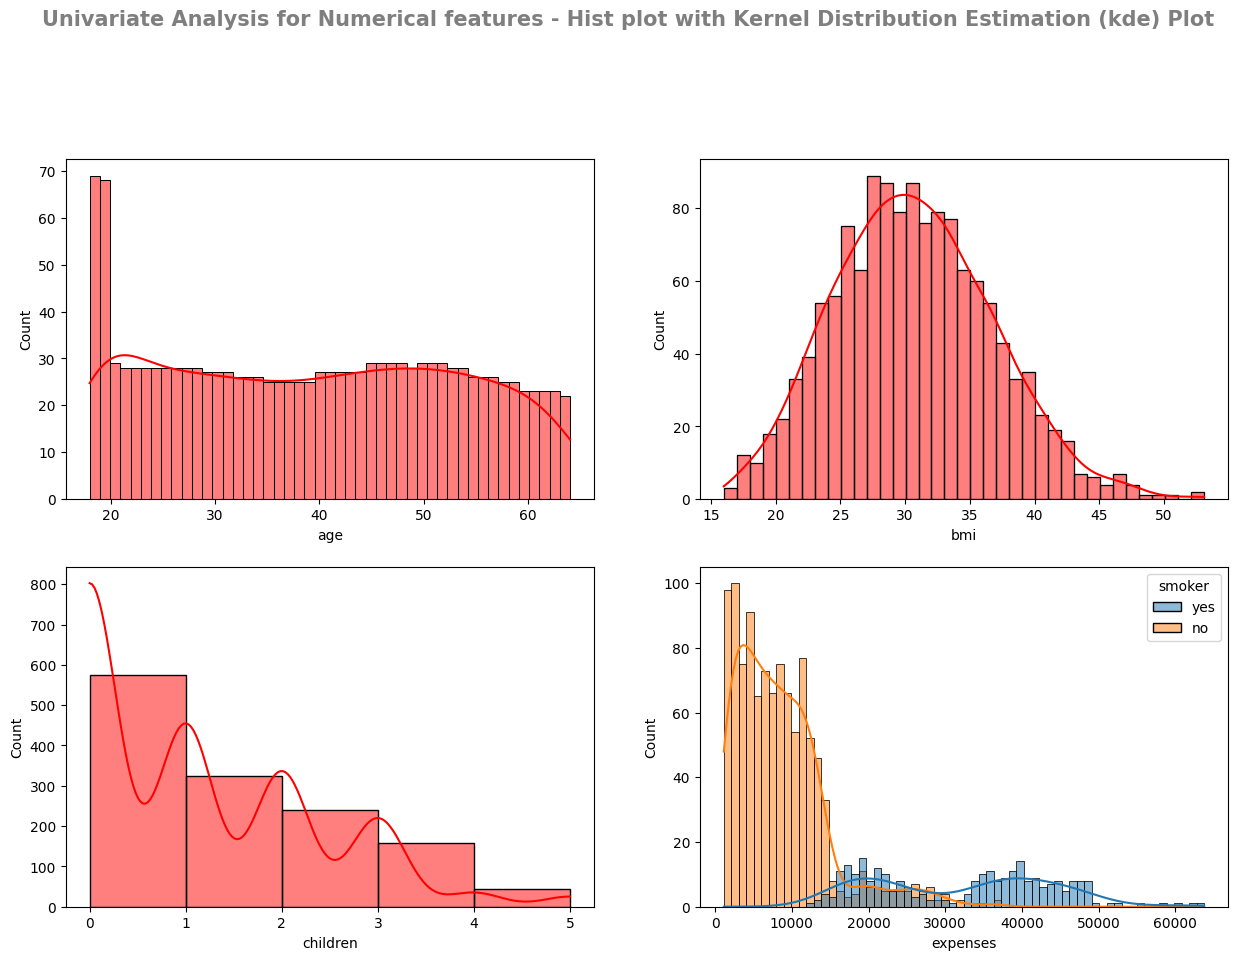

In [66]:
from textwrap import fill

plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis for Numerical features - Hist plot with Kernel Distribution Estimation (kde) Plot" , fontsize = 15 , fontweight = 'bold',alpha = 0.5)

for i in range(0,len(numerical_features)):
    bins_for_plot = [47,37,5,64]
    hue_list = [None,None,None,data_set['smoker']]
    plt.subplot(3, 2, i+1)
    sns.histplot(x = data_set[numerical_features[i]], bins = bins_for_plot[i] , kde=True, fill = True , color = 'r' ,hue = hue_list[i])
    plt.xlabel(numerical_features[i])

#Saving plot for future refereb=nce of EDA
plt.savefig('./plots/Uni_num(hist_with_kde).png')

**Report\Conclusion**: 
- From above plots we observe that `expense` and `children` are slightly positively skewed.

**Age**

- The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year).

- The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as of other ages.

**bmi**

- A person’s Body-Mass Index, or BMI, helps them check whether they’re a healthy weight for their height. If a person weighs less or more than the recommended weight for their height, it could lead to health issues in the future.

- The measurements of body mass index seem to form a Gaussian\normal distribution centered around the value 30, with a few outliers towards the right.

        BMI:
        
        Underweight – BMI less than 18.5

        Normal weight – BMI between 18.5 and 24

        Overweight – BMI between 25 and 29.9
        
        Obese – BMI betweem 30 - 39.9

        morbid obese - BMI above 40 

-  Most of the customers are overweight and obses.

**expenses**

- For most customers, the annual medical expenses are under 10k. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution roughly follows a "power law".

- There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is 7.3k, the median for smokers is close to 35k.









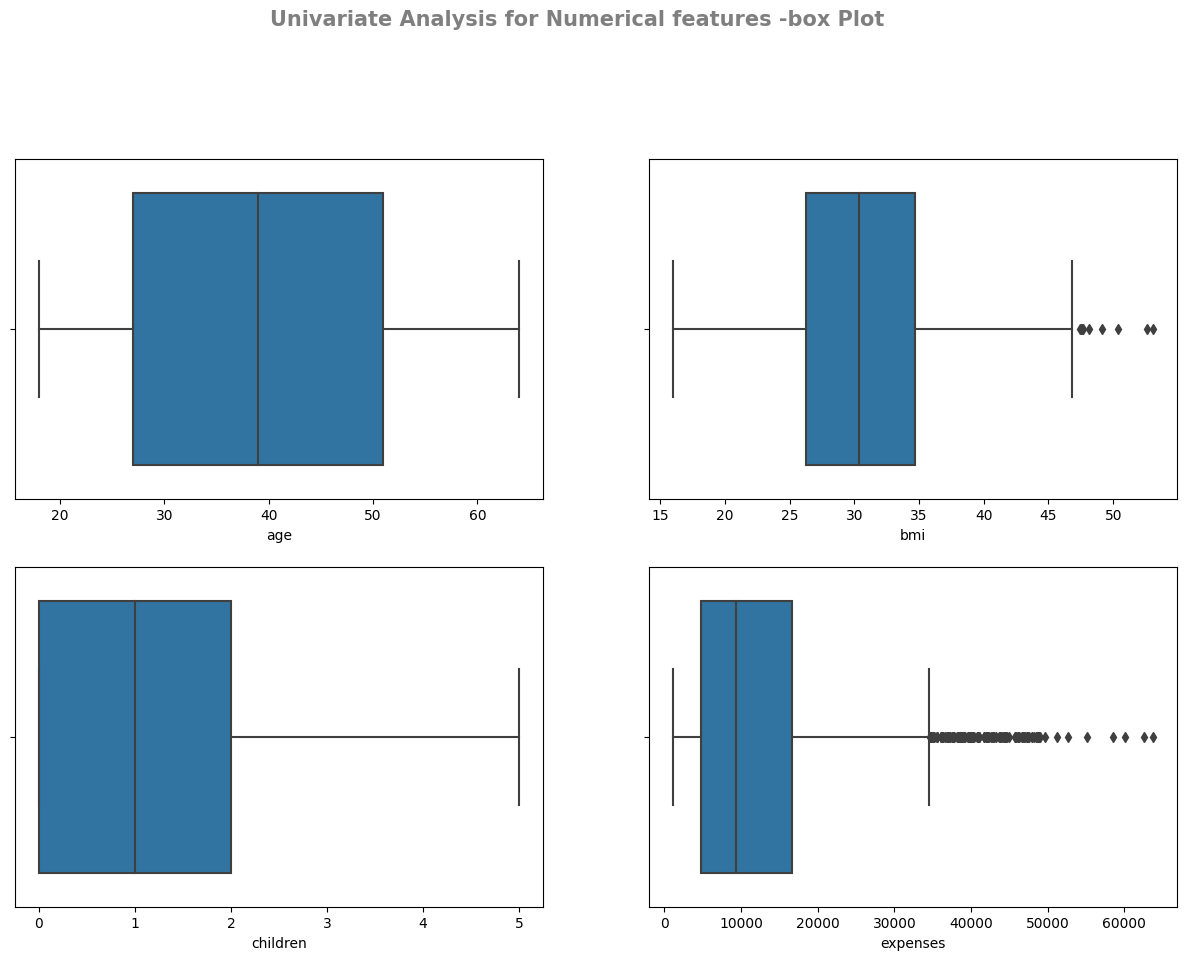

In [13]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis for Numerical features -box Plot" , fontsize = 15 , fontweight = 'bold',alpha = 0.5)
for i in range(0,len(numerical_features)):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x = data_set[numerical_features[i]])
    plt.xlabel(numerical_features[i])

#Saving plot for future refereb=nce of EDA
plt.savefig('./plots/Uni_num(boxplot).png')

**Conclusion**:

From above plots we observe that `bmi` has some outliers and `expenses` also has outliers so we have to deal with it.

##### ---> For Categorical Features

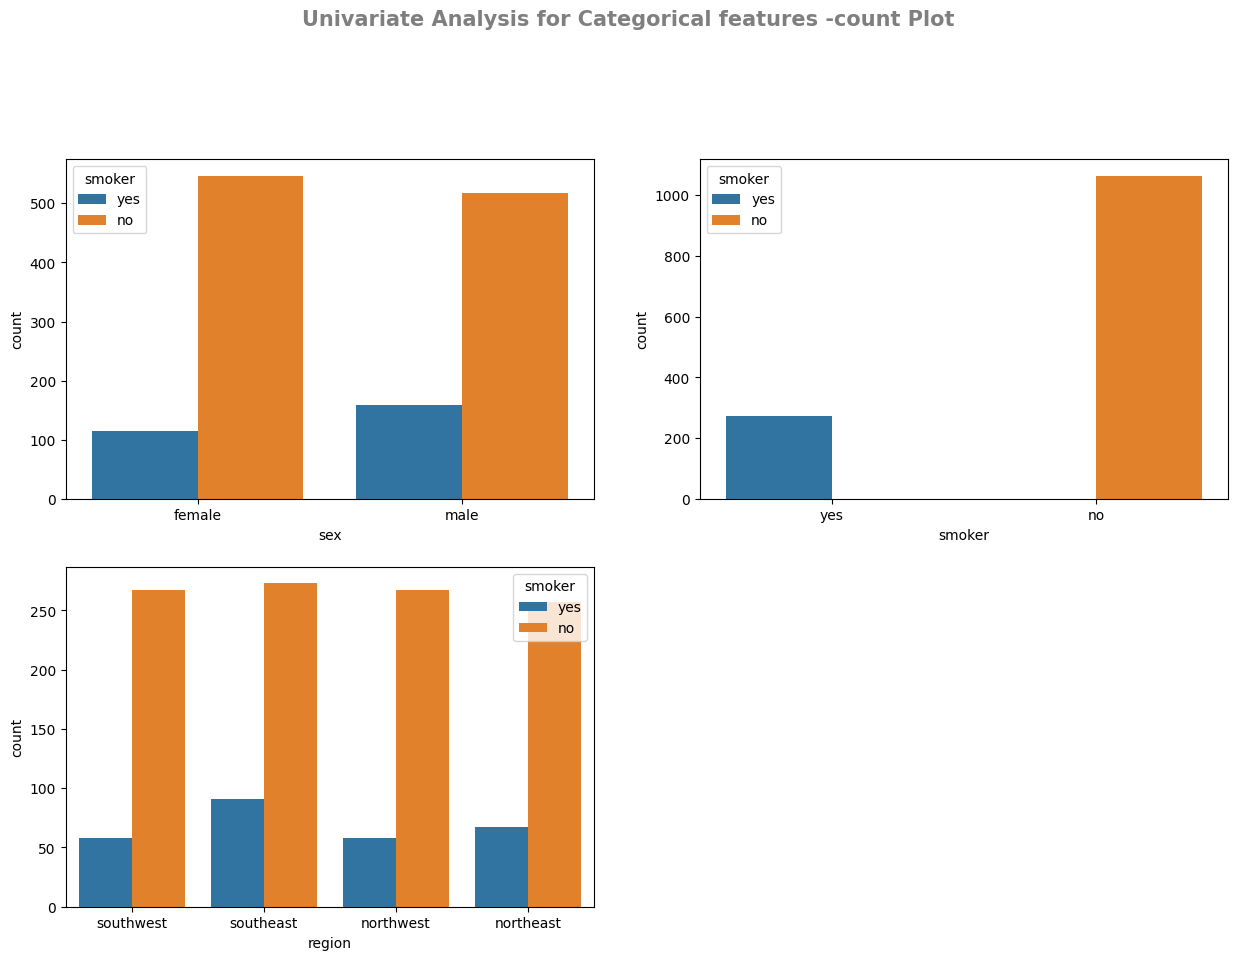

In [73]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis for Categorical features -count Plot" , fontsize = 15 , fontweight = 'bold',alpha = 0.5)
for i in range(0,len(categorical_features)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x = data_set[categorical_features[i]], hue= data_set['smoker'])
    plt.xlabel(categorical_features[i])

#Saving plot for future refereb=nce of EDA
plt.savefig('./plots/Uni_cat(countplot).png')

**Conclusion** :

From the above graph we make some observations.

- We can see that smoking appears a more common habit among males which may cause serious health issues more in male.

- Count of smokers are less as compared to the no-smokers customers.


### Graphical Multivariate Analysis:

In Multivariate Analysis, we analyze data of more than one variable. 

**Relationships between numeric features and other numeric features (Heatmap of the correlations)**
**i.e checking the multicolliearity in Numerical features**

A correlation is a value between -1 and 1 that amounts to how closely values of two separate features move simultaneously. A positive correlation means that as one feature increases the other one also increases, while a negative correlation means one feature increases as the other decreases. Correlations close to 0 indicate a weak relationship while closer to -1 or 1 signifies a strong relationship.

We will use `df.corr()` to calculate the correlations between the numeric features and it returns a DataFrame.
 

##### Heat map

In [18]:
data_set.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


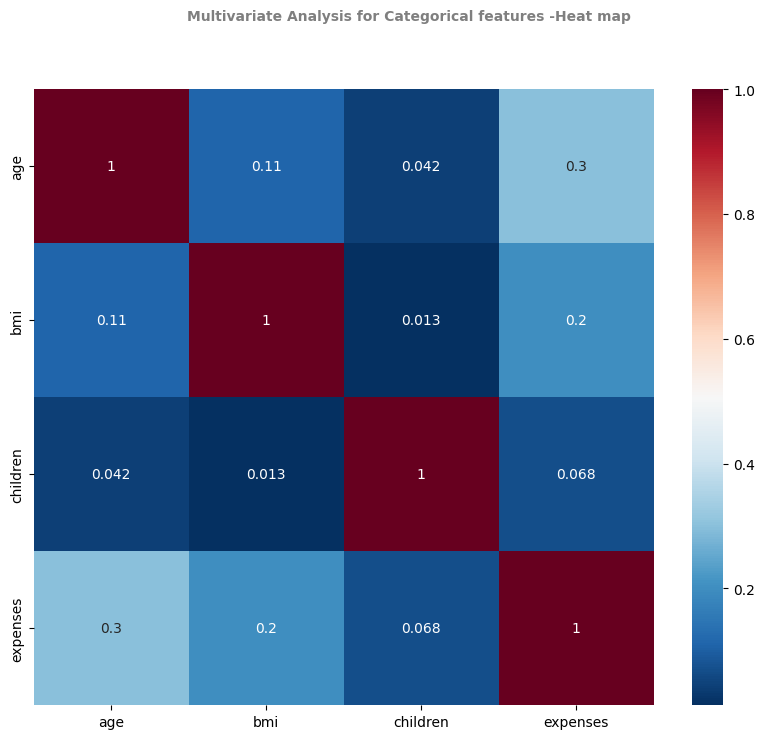

In [19]:
plt.figure(figsize=(10,8))
plt.suptitle("Multivariate Analysis for Categorical features -Heat map" , fontsize = 10 , fontweight = 'bold',alpha = 0.5)
sns.heatmap(data_set.corr(), cmap='RdBu_r', annot= True)


plt.savefig('./plots/Multi_num(Heat_map).png')


**Conclusion:**

From above heatamap it can be obserbed that no collinearity is there in this dataset.

    - Note that a high correlation cannot be used to interpret a cause-effect relationship between features. Two features X and Y can be correlated if  X causes Y  or if Y causes X , or if both are caused independently by some other factor , and the correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that  X and Y  simply appear to be correlated because the sample is too small.

    As we can tell from the analysis, the values in some columns are more closely related to the values in "expenses" compared to other columns. E.g. "age" and "expenses" seem to grow together, whereas "bmi" and "expenses" don't.

In [20]:
# Continous features calculation
continous_features = [i for i in numerical_features if len(data_set[i].unique()) >= 15]
continous_features


['age', 'bmi', 'expenses']

##### Scatter plot

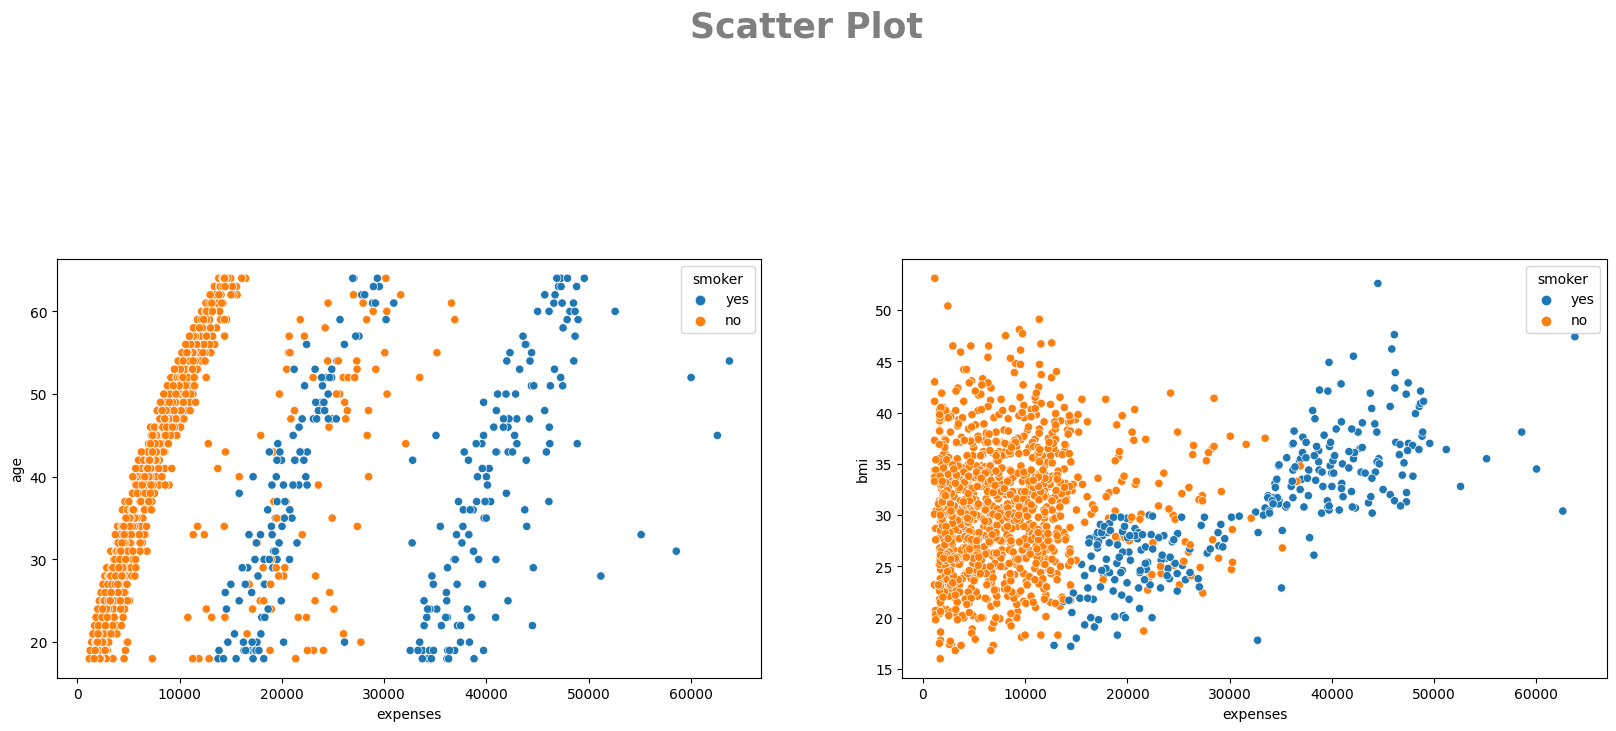

In [82]:
plt.figure(figsize=(20,25))
plt.suptitle("Scatter Plot" , fontsize = 25 , fontweight = 'bold',alpha = 0.5)
for i in range(0, (len(continous_features)-1)):
    plt.subplot(4,2, i+1)
    sns.scatterplot(data = data_set , x = 'expenses' , y = continous_features[i], hue = 'smoker', color = 'b')

plt.savefig('./plots/Multi_num(SCATTER_PLOT).png')
    
    

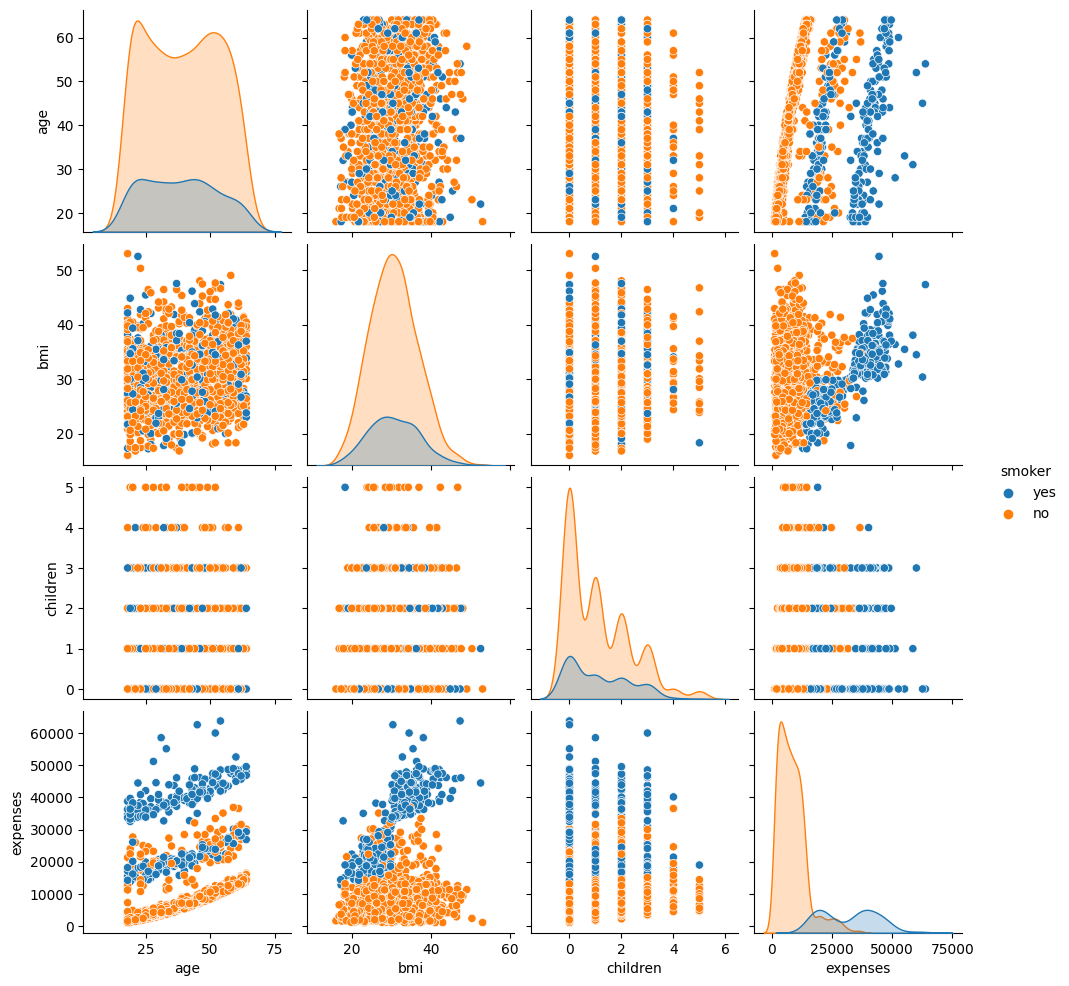

In [83]:
sns.pairplot(data_set ,hue='smoker')

#### Visualization of the target feature

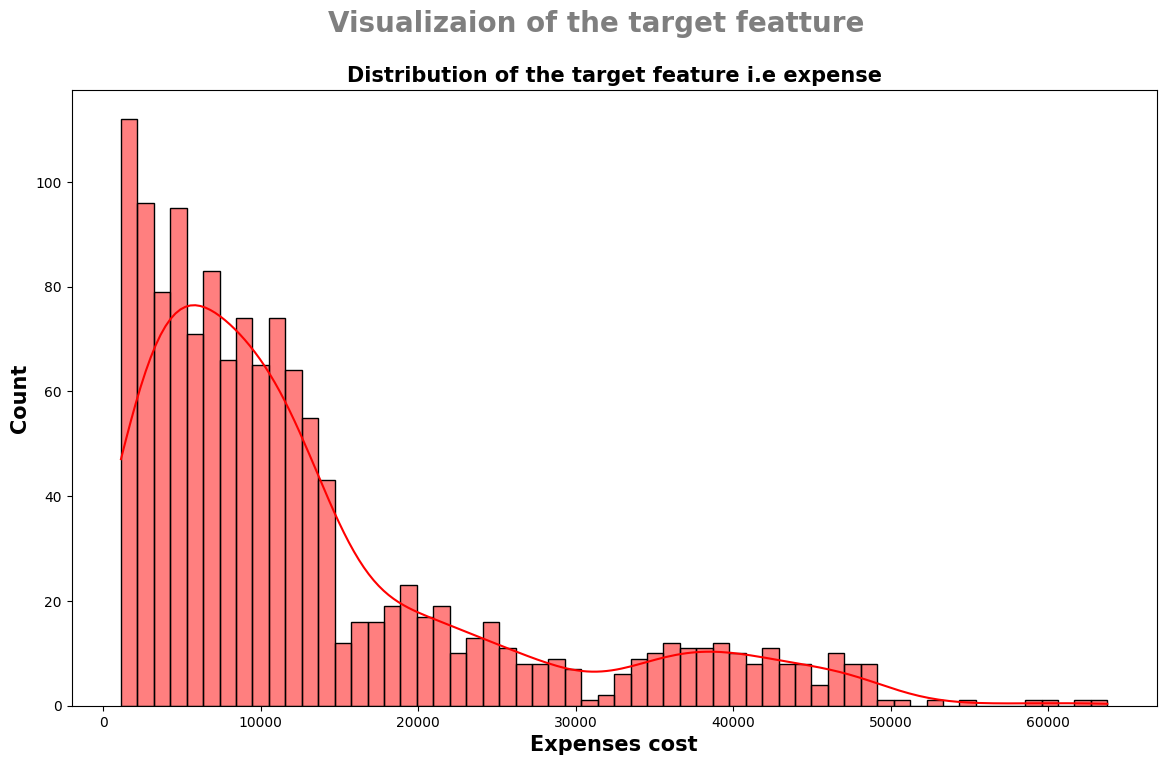

In [74]:
plt.figure(figsize=(14,8))
sns.histplot(data_set['expenses'], bins=60 , kde= True , color = 'r')
plt.suptitle("Visualizaion of the target featture" , fontsize = 20 , fontweight = 'bold',alpha = 0.5)
plt.title("Distribution of the target feature i.e expense" , weight = "bold" , fontsize = 15)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Expenses cost", weight="bold", fontsize=15)


plt.savefig('./plots/target_feature_distribution.png')

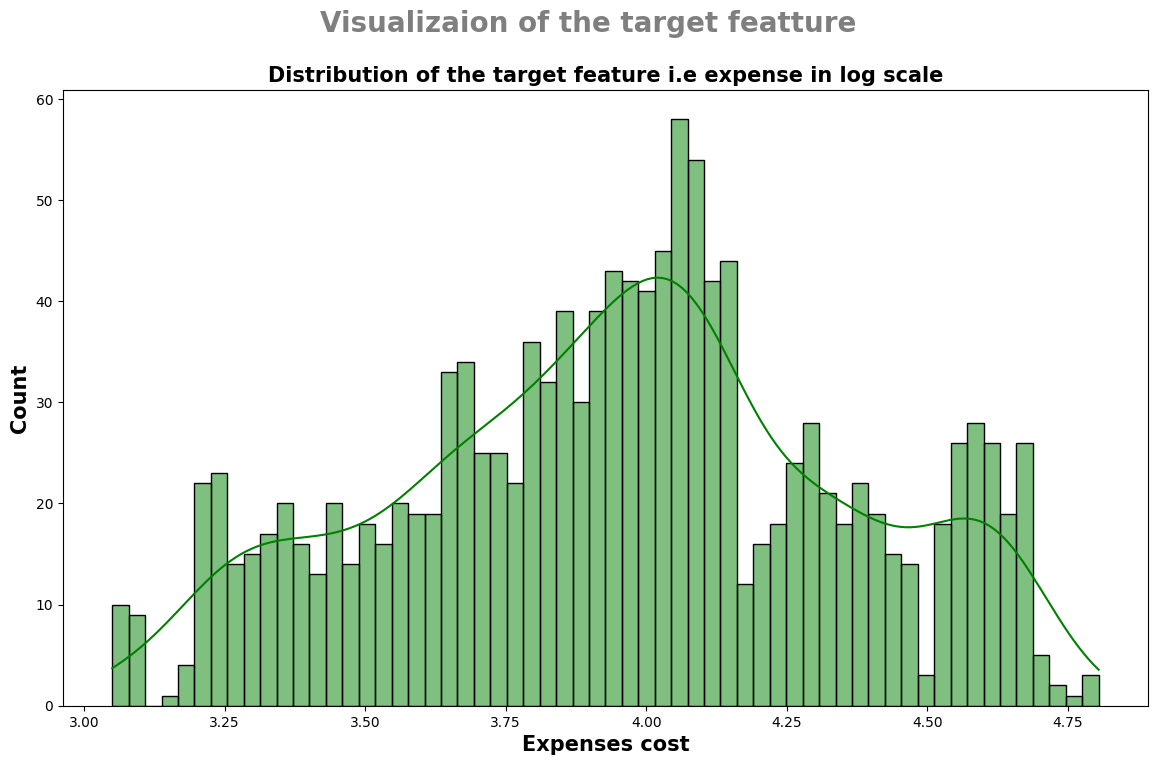

In [76]:
plt.figure(figsize=(14,8))
sns.histplot(np.log10(data_set['expenses']), bins=60 , kde= True , color = 'g')
plt.suptitle("Visualizaion of the target featture" , fontsize = 20 , fontweight = 'bold',alpha = 0.5)
plt.title("Distribution of the target feature i.e expense in log scale" , weight = "bold" , fontsize = 15)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Expenses cost", weight="bold", fontsize=15)


plt.savefig('./plots/target_feature_distribution_in_log_scale.png')

If we look at the top plot(red plot) the expenses varies from 1120 to 63500, the plot is right skewed. In above plot(greeen plot) plot we will apply natural log, then plot approximately tends to normal. for further analysis we will apply log on target variable charges.